# Simulating Coin Tosses

## Creating the Simulation

Let's generate some data to analyze by running some random simulations. First we will define a function which gives the result of a fair coin toss. This uses the package `random`.

In [1]:
import random as r # Import the package 'random' with an abbreviation.
import numpy as np # We'll use this later, so let's import now.

In [2]:
# The package random contains a function called 'random'. Let's see what it does.
r.random()

0.7795098072017261

The function seems to generate a random real number. Let's experiment to see if we can pin down exactly what it does.

In [3]:
for j in range(20): # Use range(20) to run over all j in the list [0,1,...,19]
    print(r.random())

0.8868663847734695
0.6455326051816865
0.3728270161921724
0.6270722898401047
0.6120283271025072
0.42520258899484054
0.2510403311252709
0.6553683344487169
0.8746548637480469
0.7088632764770644
0.1556812454997316
0.5053512664203377
0.49292640235718277
0.4280677175105779
0.5184267530315798
0.6912227361895042
0.4169593068983656
0.38203179864598136
0.907514242828279
0.5822929337702606


Apparently it generates a random number between 0 and 1. Indeed, this is the case, as we can check in the documentation here: https://docs.python.org/2/library/random.html#module-random

Now let's use this function to define a new `coin toss` function.

In [4]:
# Define our 'coin toss' function.
def coin():
    u = r.random()
    if u < 0.5:
        return "H"
    else:
        return "T"

# Toss the coin 10 times and look at the result.
for i in range(0, 10):
    print(coin(), end =" ") # To print the output on the same line, we include an option in the print function.

T T H T T T H H H T 

Since we wish to experiment with randomness, it would be good to have a function which runs the coin toss experiment several times. The input of our function will be a positive integer and the output will be a string of H's and T's.

In [5]:
def run_coin(n):
    result = "" # Initialize the output of the function as an empty string
    for k in range(n):
        result = result + coin() # Loop over the range of n and add the coin toss result to the output each iteration
    return result

run_coin(20)

'THTHTTHTTHHTHTTTHTTT'

### Exercise 

Write a function `count_heads` whose input is a result of the `run_coin(n)` function and whose output is the number of H's in the string.

In [10]:
# Test your function 
result = run_coin(20)
print(result, count_heads(result))

HTTTHTTHHHTHTHHTTTTH 9


Suppose that we would like to determine whether the coin we are tossing is fair. We could toss it, say, 20 times then count the number of heads. Of course, we don't expect to get 10 heads every time we do this, but if we ran this experiment several times then we should expect the average over all experiments to converge to 10.

Let's try it.

In [11]:
for j in range(10):
    print(count_heads(run_coin(20)),end = " ")

12 8 13 9 10 7 13 8 12 11 

## Statistics of the Experiment

Looks reasonable, but it's hard to eyeball whether this is actually a good result. Let's write some functions to:

1) automate our experiment

2) analyze it quantitatively


In [12]:
# First we write a function to carry out the experiment. 
# We want to toss the coin 'num_tosses' times, then repeat this 'num_repeats' times.
# We should store our results in a list.

def coin_experiment(num_tosses,num_repeats):
    results = []
    for j in range(num_repeats):
        results.append(count_heads(run_coin(num_tosses)))
    return results

coin_experiment(20,10)

[9, 5, 8, 10, 12, 12, 6, 11, 10, 10]

In [13]:
# Now let's define a function to take the mean of a list.
# Certainly such a function already exists in some package, but let's just create it our ourselves.

def mean(L):
    return sum(L)/len(L)

# Try computing the mean of an experiment:
mean(coin_experiment(20,10))

10.5

How do you expect the mean of the experiment to behave if we fix the number of tosses and increase the number of repeats? Vice-versa? We could play around with parameters to get an idea for it.

An important part of exploratory data analysis is visualization. Let's look at a plot of this data. A standard package for generating plots is called matplotlib.

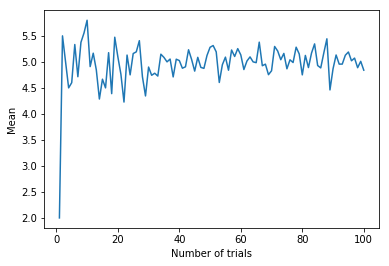

In [15]:
import matplotlib.pyplot as plt 
# plt is a common abbreviation for matplotlib. 
# Here we are only importing a specific module from matplotlib

# Let's first fix the number of tosses at k.
k = 10

# Then let's look at what happens if we run the experiment 1 through M times.
M = 100

# We will fill a list with results of the coin experiment for k flips and t trials
L = []
for t in range(1,M+1):
    L.append(mean(coin_experiment(k,t)))

# Now we plot
plt.plot(list(range(1,M+1)),L); # Semicolon supresses some unnecessary output
# Add axis labels:
plt.ylabel('Mean')
plt.xlabel('Number of trials')

plt.show() # Display the plot

### Exercise

Write code to see what happens when the number of trials is fixed (say at 10), but the number of flips per trial runs between (say) 1 and 100.

The plot should look quite different than what we got in the last plot. How can your output be normalized so that we get more comparable graphs?

# More Statistics and Lambda Functions

## Lambda Functions

Next we want to compute some more statistics about our experiment, which involves defining more functions. Let's take the opportunity to detour a bit into a new way to define functions: Lambda Functions. 

Basically, we can use lambda notation to define functions in a single line without storing them under a name. This leads to cleaner code, and is extremely useful for defining functions whose input and/or output is a function (think, e.g., linear operators in functional analysis).

The syntax is different from what we have done before. Let's use lambda notation to define a function which takes a real number $x$ and outputs its square $x^2$. We will evaluate our function immediately on $x=3$.

In [16]:
(lambda x: x*x)(3)
# The first parenthesis defines a function "x mapsto x*x". 
# We then evaluate it on x=3 with the second parentheses.

9

What if we want to apply our function to a range of values with one command? The `map` function takes as input a function and an iterable (like a list) and outputs the function values on each element of the iterable. 

The output of `map` is a 'map object', which we transform into a list using the function `list`.

In [17]:
list(map(lambda x: x**2, range(10)))
# Applies the function $x \mapsto x^2$ to the list [0,1,...,9]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

The `map` function is also very useful; it not only produces cleaner code, but can also have a big effect on performance. This is because the `map` is lazily evaluated, meaning that the list doesn't need to be generated and stored in memory before applying the function.

For example, we can run the following code very easily. On the other hand, we could not actually create a list with $10^100$ entries (we'd run out of memory!).

In [18]:
for s in map(lambda x: x**2, range(10**100)):
    print(s)
    if s > 10:
        break

0
1
4
9
16


To see an example of how these lambda functions might be useful, let's define a function which takes a function as one of its inputs. The `integral` function has inputs: a function $f$, a lower bound $a$, an upper bound $b$ and a positive real number $h$. The output is the numerical approximation integral of $f$ over $[a,b]$ using subdivisions of size $h$. in particular, we are using rectangular approximations to compute the integral.

In [19]:
def integral(f, a, b, h):
    sum = 0
    x = a
    while x < b:
        sum = sum + f(x)*h
        x = x + h
    return sum

Now we can test our function. We don't need to define and store a function $f$ to evaluate `integral` on: we can use a lambda function as the input!

In [20]:
integral(lambda x:1, 0, 1, 0.1), integral(lambda x:1, 0, 1, 0.01)

(1.0999999999999999, 1.0000000000000007)

In [21]:
integral(lambda x: x, 0, 1, 0.1), integral(lambda x: x, 0, 1, 0.01), integral(lambda x:x, 0, 1, 0.001)

(0.55, 0.4950000000000004, 0.4995000000000005)

In [22]:
# Test the integral function on some other functions for which you know the correct answer.
# numpy has trig functions, called as np.sin() etc...


Finally let's use lambda functions to create a function whose input includes a function and whose output is a function. In particular, we will numerically compute the antiderivative of a function.

In [23]:
# f is a function, a is an initial condition, h is a 'step-size' parameter
def indefinite_integral(f,a,h): 
    return lambda x: integral(f, a, x, h) 
# By the fundamental theorem of calculus, this is an antiderivative!

Let's test the fuction by computing an antiderivative, then plotting it together with the original function.

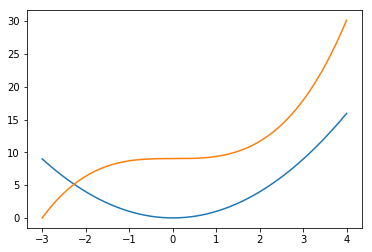

In [24]:
ff = indefinite_integral(lambda x:x*x, -3, 0.01)

t = np.arange(-3, 4, 0.01) # Sample a domain to plot the functions over

plt.plot(t,list(map(lambda x:x*x, t)));
# 'map' applies the lambda function to everything in the list
plt.plot(t,list(map(ff, t)));

# We could also plot the antiderivative that we compute 'by hand'. Try it! 
# (You should see that it is indistinguishable from the plot of the numerical version)

### Exercise

Let $f$ and $g$ be functions on the real line, and suppose that $f$ is supported on $[a,b]$ (i.e., $f(x) = 0$ for $x \not \in [a,b]$). The convolution function $f \ast g$ is defined by
$$
f\ast g (t) = \int_{a}^b f(\tau) g(t - \tau) \; \mathrm{d}\tau.
$$

Define a function 'convolution' which takes as input two functions $f$ and $g$, lower and upper bounds $a$ and $b$ and a real number $h$ (subdivision width for numerical integration) and which outputs the convolution of $f$ and $g$. 

The code below will test your convolution function on the 'pulse function' (as defined below). Does the plot make sense?

In [25]:
def pulse(x): # Define the 'pulse function'
    if x < 0:
        return 0
    elif x < 1:
        return 1
    else:
        return 0

ff = convolution(pulse, pulse, -4, 4, 0.01) # ff is the convolution of pulse with itself

# Plot pulse and the convolution
x_vals = np.linspace(-3,5,100)
y1 = list(map(ff, x_vals))
y2 = list(map(pulse,x_vals))
plt.plot(x_vals, y1)
plt.plot(x_vals,y2)

NameError: name 'convolution' is not defined

## Back to Statistics

Let's write a function to compute the standard deviation of a dataset. Certainly this can be found in some package, but let's write it from scratch for the practice. Recall that the standard deviation $\sigma = \sigma(X)$ of a dataset $X = \{x_i\}_{i=1}^N$ is given by
$$
\sigma = \left(\frac{1}{N} \sum_{i=1}^N \left(x_i - \mu \right)^2 \right)^{1/2},
$$
where $\mu = \mu(X)$ is the mean of $X$. (

We will write our function by defining intermediate functions, then combining them to get $\sigma$. This \emph{modular} style of programming is good practice. This is because the intermediate functions might be interesting or useful in their own right. 

In [ ]:
# First define a function which centers the data on a fixed value.
# This takes each data point and subtracts off the chosen center.

def delta(data, center):
    return map(lambda x: x - center, data)
   
# Test
X = [1,2,3,4]
c = 5

list(delta(X,c)) 
# Note: The output of delta is a 'map object'. This is passed to a list by the above command.
# A map object can also be converted to a set by the command set(). 
# Set is another data structure that we haven't work with yet.

In [ ]:
# Here is a function to compute deviations from the mean:

def deviation(data):
    return delta(data, mean(data))

list(deviation(X))

In [ ]:
# To compute the variance, we square the deviations, add, 
# and divide by the number of data points

def variance(data):
    squares = map(lambda x: x*x, deviation(data))
    return sum(squares)/len(data)

variance(X)

In [ ]:
import math

# Finally, the standard deviation is the square root of the variance:
def stdev(data):
    return math.sqrt(variance(data))
    
stdev(X)

In [ ]:
# Let's return to the statistica of our experiments:
data = coin_experiment(100, 10)
print("mean", mean(data))
print("variance", variance(data))
print("stdev", stdev(data))
print("relstdev",stdev(data)/mean(data)) # 'Relative standard deviation'

### Exercise

Play with the 'number of tosses' and 'number of trials' parameters to determine the qualitative behavior of the relative standard deviation across parameters. Create a plot to illustrate your findings.

# Homework: Random Walks

1) Create a new function `biased_coin(p)` which takes a probability $p \in (0,1)$ that the coin flips to 'H'. Run through all of the experiments that we did above using your biased coin with several choices of $p$.

2) Use the biased_coin function to define a 1-dimensional random walk. That is, at each time step, the walker decides by the biased coin flip whether to walk 'up' or 'down' one step along the y-axes. Plot several random walks over long spans of time (say, 1000 steps? Or 10,000?) for various values of $p$. What qualitative behavior do you observe?